In [67]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

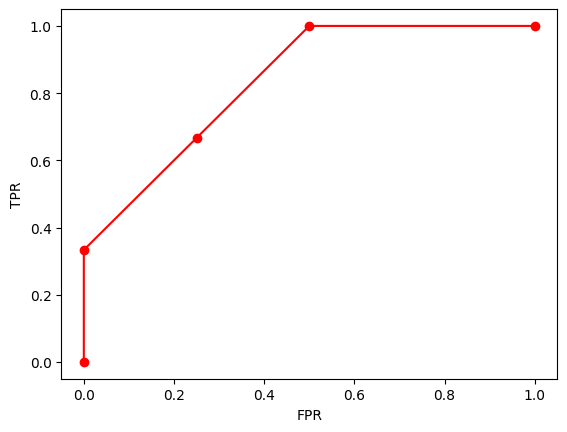

In [125]:
# Section 1 Question 5 Part (a)
fpr_values = [0, 0, 1/4, 1/2, 1]
tpr_values = [0, 1/3, 2/3, 1, 1]

# Reused code from hw2
plt.plot(fpr_values, tpr_values, marker = 'o', color = "Red")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [84]:
def euclidean_distance_two_features(x1, x2, df_x1, df_x2):
    # print(type(x1), x1)
    # print(type(x2), x2)
    # print(type(df_x1), df_x1)
    # print(type(df_x2), df_x2)
    return math.sqrt((df_x1 - x1) ** 2 + (df_x2 - x2) ** 2)

In [85]:
def knn_classify_two_features(x1, x2, df, k):
    distance_class_label = []
    for i in range(0, len(df)):
        distance_class_label.append([euclidean_distance_two_features(x1, x2, df['x1'][i], df['x2'][i]), df['y'][i]])
    distance_class_label.sort()
    count_zeros = 0
    count_ones = 0
    for i in range(0, k):
        if distance_class_label[i][1] == 0:
            count_zeros += 1
        elif distance_class_label[i][1] == 1:
            count_ones += 1
        else:
            raise Exception("Invalid class label!" + str(distance_class_label[1]))
    return 0 if count_zeros > count_ones else 1

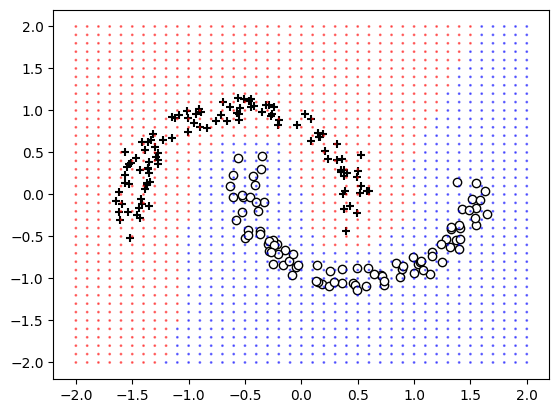

In [86]:
# Section 2 Question 1
file_name = 'D2z.txt'
df = pd.read_csv(file_name, delim_whitespace=True, header = None)
df.columns = ['x1', 'x2', 'y']
df.reset_index()

x1_range = np.arange(-2, 2.1, 0.1)
x2_range = np.arange(-2, 2.1, 0.1)

x1_values = []
x2_values = []
colors = []

for i in range(0, len(x1_range)):
    for j in range(0, len(x2_range)):
        x1 = x1_range[i];
        x2 = x2_range[j];
        x1_values.append(x1)
        x2_values.append(x2)
        colors.append('Blue' if knn_classify_two_features(x1, x2, df, 1) == 0 else 'Red')

df_x1_values_for_y_0 = []
df_x2_values_for_y_0 = []
df_x1_values_for_y_1 = []
df_x2_values_for_y_1 = []


# Reused code from hw2
df_zeros = df[df['y'] == 0]
df_ones = df[df['y'] == 1]

plt.scatter(df_zeros['x1'], df_zeros['x2'], marker = 'o', color = 'White', edgecolors = 'Black')
plt.scatter(df_ones['x1'], df_ones['x2'], marker = '+', color = 'Black')

plt.scatter(x1_values, x2_values, c = colors, s = 1, alpha = 0.5)

plt.show()

In [130]:
def euclidean_distance(row_1, row_2):

    # Original code is commented below, but is slow
    
    # sum_of_squares = 0
    # for element_1, element_2 in zip(row_1, row_2):
    #     sum_of_squares += (element_2 - element_1) ** 2
    # euclidean_distance = math.sqrt(sum_of_squares)
    # return euclidean_distance

    # Rewritten code for faster computation using numpy
    return np.linalg.norm(row_2 - row_1)

In [131]:
def knn_classify_row(test_row, df_train, k):

    # Original code is commented below, but is slow
    
    # distance_class_label = []
    # df_train_features = df_train.loc[:, df.columns != 'Prediction']
    
    # for i in range(0, len(df_train)):
    #     distance_class_label.append([euclidean_distance(test_row, df_train_features.iloc[i]), df_train['Prediction'].iloc[i]])
    # distance_class_label.sort()
    # count_zeros = 0
    # count_ones = 0
    # for i in range(0, k):
    #     if distance_class_label[i][1] == 0:
    #         count_zeros += 1
    #     elif distance_class_label[i][1] == 1:
    #         count_ones += 1
    #     else:
    #         raise Exception("Invalid class label!" + str(distance_class_label[1]))
    # return 0 if count_zeros > count_ones else 1

    # Rewritten for faster computation using numpy

    train_features = df_train.iloc[:, :-1].to_numpy()
    distances = np.array([euclidean_distance(test_row, row) for row in train_features])
    sorted_index_array = np.argsort(distances)
    labels_for_k_nearest_neighbours = df_train.iloc[sorted_index_array[:k], -1]
    if (labels_for_k_nearest_neighbours == 0).sum() > (labels_for_k_nearest_neighbours == 1).sum():
        return 0
    else:
        return 1

In [257]:
def knn_classify(df_train, df_test, k):

    df_train_features = df_train.iloc[:, :-1]
    df_test_features = df_test.iloc[:, :-1]

    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0

    for i in range(len(df_test)):
        predicted_class_label = knn_classify_row(df_test_features.iloc[i].to_numpy(), df_train, k)
        if df_test['Prediction'].iloc[i] == 0:
            if predicted_class_label == 0:
                # correctly classified as negative
                true_negatives += 1
            elif predicted_class_label == 1:
                # incorrectly classified as positive
                false_positives += 1
            else:
                raise Exception("Invalid predicted class label!")
        elif df_test['Prediction'].iloc[i] == 1:
            if predicted_class_label == 0:
                # incorrectly classified as negative
                false_negatives += 1
            elif predicted_class_label == 1:
                # correctly classified as positive
                true_positives += 1
            else:
                raise Exception("Invalid predicted class label!")
        else:
            raise Exception("Invalid class label in dataframe!")

    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    return accuracy, precision, recall

In [258]:
def knn_classify_five_folds(df, k):
    file_name = 'emails.csv'
    df = pd.read_csv(file_name)
    df.drop(['Email No.'], axis = 1, inplace = True)
    df.reset_index()

    accuracy_array = np.array([])
    precision_array = np.array([])
    recall_array = np.array([])
    
    # Fold 1
    df_train = df.iloc[1000:]
    df_test = df.iloc[:1000]
    print("\nFor Fold 1, we have the following accuracy, precision, and recall:")
    accuracy, precision, recall = knn_classify(df_train, df_test, k)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    accuracy_array = np.append(accuracy_array, accuracy)
    precision_array = np.append(precision_array, precision)
    recall_array = np.append(recall_array, recall)
    
    # Fold 2
    df_train = pd.concat([df.iloc[:1000], df.iloc[2001:]])
    df_test = df.iloc[1000:2001]
    print("\nFor Fold 2, we have the following accuracy, precision, and recall:")
    accuracy, precision, recall = knn_classify(df_train, df_test, k)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    accuracy_array = np.append(accuracy_array, accuracy)
    precision_array = np.append(precision_array, precision)
    recall_array = np.append(recall_array, recall)
    
    # Fold 3
    df_train = pd.concat([df.iloc[:2000], df.iloc[3001:]])
    df_test = df.iloc[2000:3001]
    print("\nFor Fold 3, we have the following accuracy, precision, and recall:")
    accuracy, precision, recall = knn_classify(df_train, df_test, k)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    accuracy_array = np.append(accuracy_array, accuracy)
    precision_array = np.append(precision_array, precision)
    recall_array = np.append(recall_array, recall)
    
    # Fold 4
    df_train = pd.concat([df.iloc[:3000], df.iloc[4001:]])
    df_test = df.iloc[3000:4001]
    print("\nFor Fold 4, we have the following accuracy, precision, and recall:")
    accuracy, precision, recall = knn_classify(df_train, df_test, k)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    accuracy_array = np.append(accuracy_array, accuracy)
    precision_array = np.append(precision_array, precision)
    recall_array = np.append(recall_array, recall)
    
    # Fold 5
    df_train = df.iloc[:4000]
    df_test = df.iloc[4000:]
    print("\nFor Fold 5, we have the following accuracy, precision, and recall:")
    accuracy, precision, recall = knn_classify(df_train, df_test, k)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    accuracy_array = np.append(accuracy_array, accuracy)
    precision_array = np.append(precision_array, precision)
    recall_array = np.append(recall_array, recall)

    return accuracy_array, precision_array, recall_array

In [144]:
# Section 2 Question 2

file_name = 'emails.csv'
df = pd.read_csv(file_name)
df.drop(['Email No.'], axis = 1, inplace = True)
df.reset_index()

knn_classify_five_folds(df, 1)


For Fold 1, we have the following accuracy, precision, and recall:
Accuracy = 0.825
Precision = 0.6536312849162011
Recall = 0.8210526315789474

For Fold 2, we have the following accuracy, precision, and recall:
Accuracy = 0.8551448551448552
Precision = 0.6896551724137931
Recall = 0.8664259927797834

For Fold 3, we have the following accuracy, precision, and recall:
Accuracy = 0.8651348651348651
Precision = 0.7272727272727273
Recall = 0.8421052631578947

For Fold 4, we have the following accuracy, precision, and recall:
Accuracy = 0.8531468531468531
Precision = 0.7215568862275449
Recall = 0.8169491525423729

For Fold 5, we have the following accuracy, precision, and recall:
Accuracy = 0.775
Precision = 0.6051948051948052
Recall = 0.761437908496732


In [186]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

In [265]:
def f(df_features, theta):
    # print(X.shape)
    # print(theta.shape)
    dot_product = np.dot(df_features, theta)
    return sigma(dot_product)

In [271]:
def get_final_theta(initial_theta, df_train):

    df_train_features = df_train.iloc[:, :-1].to_numpy()
    df_train_labels = df_train.iloc[:, -1].to_numpy()

    theta = initial_theta
    epochs = 1000
    eeta = 0.5

    for i in range(0, epochs):
        gradient = np.dot(df_train_features.T, f(df_train_features, theta) - df_train_labels)
        theta = theta - (eeta * gradient)

    # print(f"Final Theta = {theta}")
    return theta

In [273]:
def get_metrics(final_theta, df_test):
    df_test_features = df_test.iloc[:, :-1].to_numpy()
    df_test_labels = df_test.iloc[:, -1].to_numpy()
    model_predicted_labels = f(df_test_features, final_theta).round()
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0
    for i in range(0, len(df_test)):
        if df_test_labels[i] == 0:
            if model_predicted_labels[i] == 0:
                true_negatives += 1
            else:
                false_positives += 1
        else:
            if model_predicted_labels[i] == 0:
                false_negatives += 1
            else:
                true_positives += 1
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)
    precision = true_positives / (true_positives + false_positives + 1)
    recall = true_positives / (true_positives + false_negatives + 1)

    return accuracy, precision, recall

In [277]:
# Section 2 Question 3

file_name = 'emails.csv'
df = pd.read_csv(file_name)
df['Email No.'] = 1.0 # This is the bias
df.reset_index()

accuracy_array = np.array([])
precision_array = np.array([])
recall_array = np.array([])
np.seterr(over = 'ignore')

# Fold 1
df_train = df.iloc[1000:]
df_test = df.iloc[:1000]
print("\nFor Fold 1, we have the following accuracy, precision, and recall:")
initial_theta = np.zeros(3001) # Since there are 3000 features + one bias
final_theta = get_final_theta(initial_theta, df_train)
accuracy, precision, recall = get_metrics(final_theta, df_test)
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
accuracy_array = np.append(accuracy_array, accuracy)
precision_array = np.append(precision_array, precision)
recall_array = np.append(recall_array, recall)

# Fold 2
df_train = pd.concat([df.iloc[:1000], df.iloc[2001:]])
df_test = df.iloc[1000:2001]
print("\nFor Fold 2, we have the following accuracy, precision, and recall:")
initial_theta = np.zeros(3001) # Since there are 3000 features + one bias
final_theta = get_final_theta(initial_theta, df_train)
accuracy, precision, recall = get_metrics(final_theta, df_test)
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
accuracy_array = np.append(accuracy_array, accuracy)
precision_array = np.append(precision_array, precision)
recall_array = np.append(recall_array, recall)

# Fold 3
df_train = pd.concat([df.iloc[:2000], df.iloc[3001:]])
df_test = df.iloc[2000:3001]
print("\nFor Fold 3, we have the following accuracy, precision, and recall:")
initial_theta = np.zeros(3001) # Since there are 3000 features + one bias
final_theta = get_final_theta(initial_theta, df_train)
accuracy, precision, recall = get_metrics(final_theta, df_test)
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
accuracy_array = np.append(accuracy_array, accuracy)
precision_array = np.append(precision_array, precision)
recall_array = np.append(recall_array, recall)

# Fold 4
df_train = pd.concat([df.iloc[:3000], df.iloc[4001:]])
df_test = df.iloc[3000:4001]
print("\nFor Fold 4, we have the following accuracy, precision, and recall:")
initial_theta = np.zeros(3001) # Since there are 3000 features + one bias
final_theta = get_final_theta(initial_theta, df_train)
accuracy, precision, recall = get_metrics(final_theta, df_test)
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
accuracy_array = np.append(accuracy_array, accuracy)
precision_array = np.append(precision_array, precision)
recall_array = np.append(recall_array, recall)

# Fold 5
df_train = df.iloc[:4000]
df_test = df.iloc[4000:]
print("\nFor Fold 5, we have the following accuracy, precision, and recall:")
initial_theta = np.zeros(3001) # Since there are 3000 features + one bias
final_theta = get_final_theta(initial_theta, df_train)
accuracy, precision, recall = get_metrics(final_theta, df_test)
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
accuracy_array = np.append(accuracy_array, accuracy)
precision_array = np.append(precision_array, precision)
recall_array = np.append(recall_array, recall)


For Fold 1, we have the following accuracy, precision, and recall:
Accuracy = 0.913
Precision = 0.8661710037174721
Recall = 0.8146853146853147

For Fold 2, we have the following accuracy, precision, and recall:
Accuracy = 0.8961038961038961
Precision = 0.7792207792207793
Recall = 0.8633093525179856

For Fold 3, we have the following accuracy, precision, and recall:
Accuracy = 0.8911088911088911
Precision = 0.8252788104089219
Recall = 0.7762237762237763

For Fold 4, we have the following accuracy, precision, and recall:
Accuracy = 0.8721278721278721
Precision = 0.8705357142857143
Recall = 0.6587837837837838

For Fold 5, we have the following accuracy, precision, and recall:
Accuracy = 0.857
Precision = 0.7612903225806451
Recall = 0.7687296416938111




For k = 1,

For Fold 1, we have the following accuracy, precision, and recall:
Accuracy = 0.825
Precision = 0.6518105849582173
Recall = 0.8181818181818182

For Fold 2, we have the following accuracy, precision, and recall:
Accuracy = 0.8551448551448552
Precision = 0.6876790830945558
Recall = 0.8633093525179856

For Fold 3, we have the following accuracy, precision, and recall:
Accuracy = 0.8651348651348651
Precision = 0.7250755287009063
Recall = 0.8391608391608392

For Fold 4, we have the following accuracy, precision, and recall:
Accuracy = 0.8531468531468531
Precision = 0.7194029850746269
Recall = 0.8141891891891891

For Fold 5, we have the following accuracy, precision, and recall:
Accuracy = 0.775
Precision = 0.6036269430051814
Recall = 0.758957654723127
Accuracy array: [0.825      0.85514486 0.86513487 0.85314685 0.775     ]

Average accuracy = 0.8346853146853148


For k = 3,

For Fold 1, we have the following accuracy, precision, and recall:
Accuracy = 0.846
Precision = 0.67663

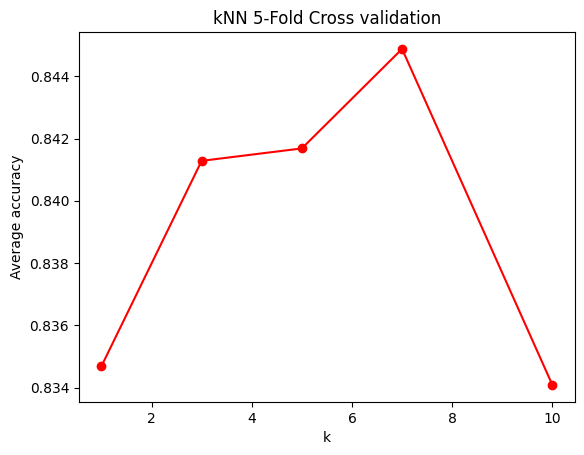

In [158]:
# Section 2 Question 4

# Please scroll down in the output to see the plot

file_name = 'emails.csv'
df = pd.read_csv(file_name)
df.drop(['Email No.'], axis = 1, inplace = True)
df.reset_index()

k_array = np.array([1, 3, 5, 7, 10])
average_accuracy_array = np.array([])

for k in k_array:
    print(f"\n\nFor k = {k},")
    accuracy_array, precision_array, recall_array = knn_classify_five_folds(df, k)
    print(f"Accuracy array: {accuracy_array}")
    average_accuracy = np.mean(accuracy_array)
    print(f"\nAverage accuracy = {average_accuracy}")
    average_accuracy_array = np.append(average_accuracy_array, average_accuracy)

plt.plot(k_array, average_accuracy_array, marker = 'o', color = "Red")
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.title('kNN 5-Fold Cross validation')
plt.show()

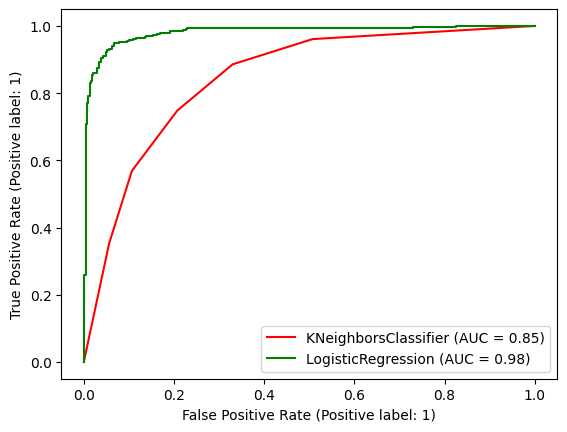

In [169]:
# Section 2 Question 5

# Code for this block is inspired from the following pages:
# 1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# 2. https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# 3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# 4. https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

file_name = 'emails.csv'
df = pd.read_csv(file_name)
df.drop(['Email No.'], axis = 1, inplace = True)
df.reset_index()

knn_model = KNeighborsClassifier(n_neighbors = 5)
logistic_regression_model = LogisticRegression(max_iter=5000)

df_train_features = df.iloc[:4000, :-1].values
df_test_features = df.iloc[4000:, :-1].values
df_train_labels = df.iloc[:4000, -1].values
df_test_labels = df.iloc[4000:, -1].values

knn_model.fit(df_train_features, df_train_labels)
logistic_regression_model.fit(df_train_features, df_train_labels)
knn_label_probabilities = knn_model.predict_proba(df_test_features)
logistic_label_properties = logistic_regression_model.predict_proba(df_test_features)
knn_label_probabilities_for_positive_class = knn_label_probabilities[:, 1]
logistic_label_probabilities_for_positive_class = logistic_label_properties[:, 1]

knn_fpr_values, knn_tpr_values, knn_threshold_values = roc_curve(df_test_labels, knn_label_probabilities_for_positive_class)
logistic_fpr_values, logistic_tpr_values, logistic_threshold_values = roc_curve(df_test_labels, logistic_label_probabilities_for_positive_class)

knn_area_under_roc_curve = auc(knn_fpr_values, knn_tpr_values)
logistic_area_under_roc_curve = auc(logistic_fpr_values, logistic_tpr_values)

plt.plot(knn_fpr_values, knn_tpr_values, color = "Red")
plt.plot(logistic_fpr_values, logistic_tpr_values, color = "Green")
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.legend([f"KNeighborsClassifier (AUC = {round(knn_area_under_roc_curve, 2)})", f"LogisticRegression (AUC = {round(logistic_area_under_roc_curve, 2)})"])
plt.show()